# 6.4: Supervised Machine Learning: Regression

## This Notebook has the following contents

## 01. Importing libraries,necessary modules and data

## 02. Data cleaning

## 03. Preparing the data for regression analysis

## 04 Regression analysis

# 01. Importing libraries,necessary modules and data

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# defining path
path = r'C:\Users\hiron\Documents\191124_FIFA22_analysis'

In [4]:
# Import data
df_clean = pd.read_csv(os.path.join(path, '02 Data', 'Derived Data', 'FIFA22_cleaned.csv'), index_col = False)

# 02. Data cleaning

### Checking missing values

In [5]:
# Check for missing values

df_clean.isnull().sum()

sofifa_id           0
short_name          0
long_name           0
player_positions    0
overall             0
                   ..
lcb                 0
cb                  0
rcb                 0
rb                  0
gk                  0
Length: 102, dtype: int64

In [6]:
# no missing values

In [7]:
df_clean.shape

(19238, 102)

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
df_clean.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_country,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,24/06/1987,170,72,73.0,Paris Saint-Germain,French Ligue 1,France,1.0,RW,30.0,NaN,10/08/2021,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,21/08/1988,185,81,21.0,FC Bayern München,German 1. Bundesliga,Germany,1.0,ST,9.0,NaN,01/07/2014,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,05/02/1985,187,83,11.0,Manchester United,English Premier League,England,1.0,ST,7.0,NaN,27/08/2021,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,05/02/1992,175,68,73.0,Paris Saint-Germain,French Ligue 1,France,1.0,LW,10.0,NaN,03/08/2017,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,28/06/1991,181,70,10.0,Manchester City,English Premier League,England,1.0,RCM,17.0,NaN,30/08/2015,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injur

### Checking duplicates

In [14]:
# checking dups
dups = df_clean.duplicated()
dups.shape

(19238,)

In [15]:
# no dups

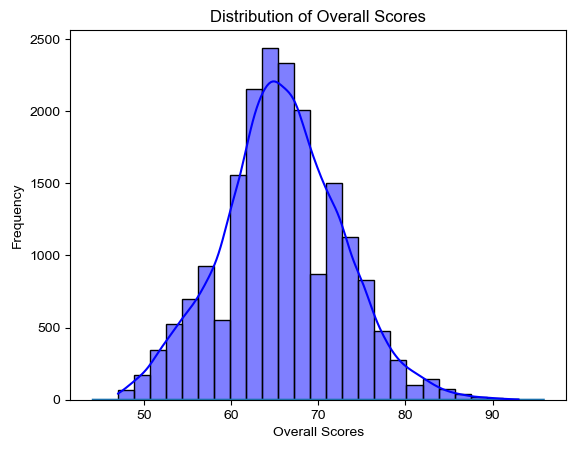

In [18]:
# Create a histogram using sns.histplot
sns.set_theme(style="darkgrid")  # Optional: Set the theme for better visuals
sns.histplot(data=df_clean, x='overall', bins=25, kde=True, color="blue", edgecolor="black")

# Add labels and title
plt.xlabel("Overall Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Overall Scores")

# Show the plot
plt.show()

### Does not show too many extreme values, we can proceed like this

In [20]:
df_clean['overall'].mean() # Check the mean

65.77128599646532

In [21]:
df_clean['overall'].median() # Check the median

66.0

In [23]:
df_clean['overall'].max() # Check the max


93

In [24]:
df_clean['overall'].min() # Check the min

47

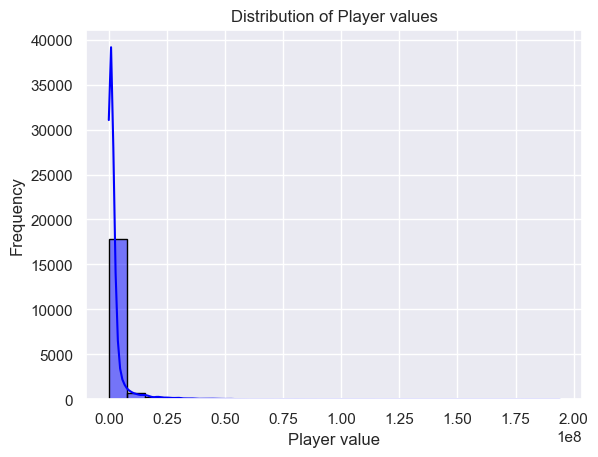

In [27]:
# Create a histogram using sns.histplot
sns.set_theme(style="darkgrid")  # Optional: Set the theme for better visuals
sns.histplot(data=df_clean, x='value_eur', bins=25, kde=True, color="blue", edgecolor="black")

# Add labels and title
plt.xlabel("Player value")
plt.ylabel("Frequency")
plt.title("Distribution of Player values")

# Show the plot
plt.show()

In [28]:
df_clean['value_eur'].mean() # Check the mean

2850451.813201148

In [29]:
df_clean['value_eur'].median() 

975000.0

In [30]:
df_clean['value_eur'].max() 

194000000.0

## The value_eur column seems to be highly right skewed potentially affecting our results but lets continue and see for the time being

# 03. Preparing the data for regression analysis

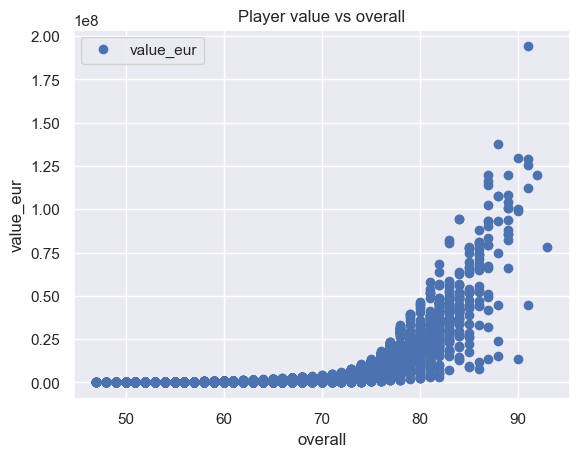

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'overall', y='value_eur',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Player value vs overall')  
plt.xlabel('overall')  
plt.ylabel('value_eur')  
plt.show()

In [38]:
# Remove rows where 'value_eur' is NaN
df = df_clean.dropna(subset=['value_eur'])

In [45]:
# Convert 'value_eur' to millions and rename the column
if 'value_eur' in df.columns:
    df['value_eur'] = df['value_eur'] / 1000000  # Convert to millions
    df.rename(columns={'value_eur': 'value(Millions)'}, inplace=True)

C:\Users\hiron\AppData\Local\Temp\ipykernel_14584\1014286129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value_eur'] = df['value_eur'] / 1000000  # Convert to millions
C:\Users\hiron\AppData\Local\Temp\ipykernel_14584\1014286129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'value_eur': 'value(Millions)'}, inplace=True)


In [46]:
df.shape

(19165, 102)

In [47]:
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value(Millions),wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_country,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78.0,320000.0,34,24/06/1987,170,72,73.0,Paris Saint-Germain,French Ligue 1,France,1.0,RW,30.0,NaN,10/08/2021,2023.0,52,Argentina,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119.5,270000.0,32,21/08/1988,185,81,21.0,FC Bayern München,German 1. Bundesliga,Germany,1.0,ST,9.0,NaN,01/07/2014,2023.0,37,Poland,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45.0,270000.0,36,05/02/1985,187,83,11.0,Manchester United,English Premier League,England,1.0,ST,7.0,NaN,27/08/2021,2023.0,38,Portugal,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129.0,270000.0,29,05/02/1992,175,68,73.0,Paris Saint-Germain,French Ligue 1,France,1.0,LW,10.0,NaN,03/08/2017,2025.0,54,Brazil,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125.5,350000.0,30,28/06/1991,181,70,10.0,Manchester City,English Premier League,England,1.0,RCM,17.0,NaN,30/08/2015,2025.0,7,Belgium,Right,5,4,4,High/High,Unique,Yes,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Ear

## Hypothesis : The higher the overall, the higher the player value is

# 04 Regression analysis

In [49]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['overall'].values.reshape(-1,1)
y = df['value(Millions)'].values.reshape(-1,1)

In [50]:
X

array([[93],
       [92],
       [91],
       ...,
       [47],
       [47],
       [47]], dtype=int64)

In [51]:
y

array([[7.800e+01],
       [1.195e+02],
       [4.500e+01],
       ...,
       [1.000e-01],
       [1.100e-01],
       [1.100e-01]])

In [52]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [55]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [57]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [58]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

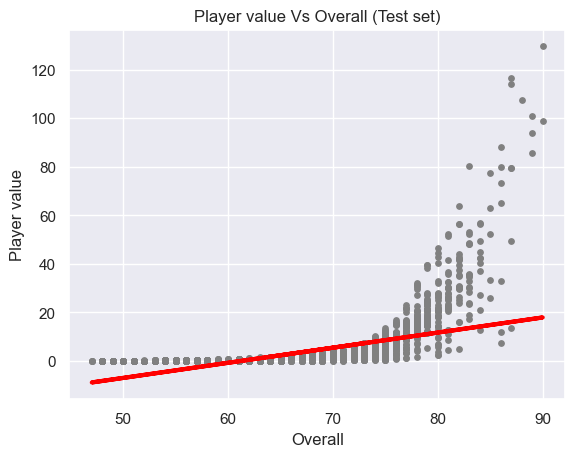

In [59]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Player value Vs Overall (Test set)')
plot_test.xlabel('Overall')
plot_test.ylabel('Player value')
plot_test.show()

## My interpretation says that the line does not fit the points to any accuracy
## Just by looking at the chart, I am thinking that this is a case for logistic regression for higher accuracy of prediction

In [61]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [62]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.62212483]]
Mean squared error:  37.04943709635447
R2 score:  0.3023111763880908


### The model shows a positive relationship between a player's overall rating and their value in millions (€). For every unit increase in overall, player value increases by approximately €622,124.### 
However, with an R² score of only 30.23%, this model explains only a portion of the variation in player value, indicating that additional features or variables should be included to improve predictive performance.### 
The MSE suggests moderate prediction error; further refinement or feature engineering may reduce this error.

In [63]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.000,7.382018
1,0.650,2.405020
2,0.130,-2.571979
3,0.190,-5.682603
4,2.100,3.649269
5,1.300,6.137769
6,0.300,-1.949854
7,1.900,5.515644
8,32.000,11.736892
9,1.900,3.027145


## As we can see here, the predicted and actual values are far away from each other which could mean this regression model is not a good fir for the data hypothesis

## The logical step to try here would be to for example compare this model at a player position and age bracket level seperately and then test

### Another case of possible data bias could be FIFA analysts favouring more popular players and forwards more in terms of estimated player value which could bias our models

In [64]:
# Export Data
df.to_csv(os.path.join(path, '02 Data', 'Derived Data', 'df_cleaned.csv'), index=False)